In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Pivot Tables ##

In [2]:
all_cones = Table.read_table('cones.csv')
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [3]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [4]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [5]:
all_cones.pivot('Color', 'Flavor')

Flavor,dark brown,light brown,pink
bubblegum,0,0,1
chocolate,2,1,0
strawberry,0,0,2


In [6]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


In [7]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=list)

Color,bubblegum,chocolate,strawberry
dark brown,None,"[5.25, 5.25]",None
light brown,None,[4.75],None
pink,[4.75],None,"[3.55, 5.25]"


In [8]:
all_cones.pivot('Color', 'Flavor', values='Price', collect=list)

Flavor,dark brown,light brown,pink
bubblegum,None,None,[4.75]
chocolate,"[5.25, 5.25]",[4.75],None
strawberry,None,None,"[3.55, 5.25]"


## Pivot Examples ##

In [9]:
# love_at_first_sight = Does love at first sight exist?
# number = Pick a number between 0 and 9.
# studying = During a typical week, how many hours do you spend studying?
# snow_white = Which of the Seven Dwarfs from Snow White are you most like?
# ...and so on
survey = Table.read_table('survey11.csv')

In [10]:
survey.show(3)

year,love_at_first_sight,number,studying,super_power,dog_cat,past_future_live,snow_white,favorite_day
First Year,Maybe,8,20,Invisible,Cat,Future,Sleepy,Saturday
Grad,Yes,3,15,Fly,Dog,Future,Doc,Friday
First Year,No,2,25,Invisible,Dog,Future,Sleepy,Friday


In [11]:
survey.pivot('love_at_first_sight', 'year')

year,Maybe,No,Yes
First Year,7,12,5
Grad,2,3,1
Junior,5,6,3
Senior,2,3,1
Sophomore,9,7,7
nan,0,2,0


In [12]:
survey.pivot('love_at_first_sight', 'super_power', values="number", collect=np.mean)

super_power,Maybe,No,Yes
Fly,5,5.53774,6
Invisible,4.77778,5.5625,5


In [13]:
nba = Table.read_table('nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [14]:
# For each team, average salary paid for each position
nba.pivot('POSITION', 'TEAM', values='SALARY', collect=np.average)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,7.58542,11.0025,4.8817,3,1.80969
Boston Celtics,2.45046,3.08548,4.97465,4.41716,2.00755
Brooklyn Nets,1.3629,4.45251,3.9,13.0403,1.74118
Charlotte Hornets,6.77224,4.68577,4.4853,3.76642,4.04238
Chicago Bulls,10.4244,3.46744,11.1715,1.95816,6.19447
Cleveland Cavaliers,7.75234,19.689,6.55159,22.9705,8.98876
Dallas Mavericks,3.23548,11.9135,4.41818,15.3615,1.21517
Denver Nuggets,2.6163,7.02498,3.72362,7.19577,0.841949
Detroit Pistons,4.0907,0,13.913,1.71622,4.58088
Golden State Warriors,6.54125,7.18637,8.45726,4.49669,9.0005


In [15]:
nba.where('POSITION', 'PF').where('TEAM', 'Detroit Pistons')

PLAYER,POSITION,TEAM,SALARY


In [16]:
nba.where('POSITION', 'C').where('TEAM', 'Atlanta Hawks').select('SALARY')

SALARY
12
9.75625
1


## Challenge Question
Which NBA teams spent the most on their “starters” in 2015-2016?

In [17]:
nba

# If we assume the "starter" is the player paid the most in each position, 
# we can use "collect = max"
starters = nba.pivot('POSITION', 'TEAM', values='SALARY', collect=max)

# Now we need to find the total paid for the starters
totals = starters.drop("TEAM").apply(sum)

# Add "totals" to our "nba_starters_salaries" table and sort by total
starters.with_column("TOTAL", totals).sort("TOTAL", descending=True)

TEAM,C,PF,PG,SF,SG,TOTAL
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876,82.3166
Oklahoma City Thunder,16.4075,12.25,16.7442,20.1586,5.13843,70.6988
Miami Heat,0,22.1927,14.783,10.1516,20,67.1273
San Antonio Spurs,7.5,19.689,13.4375,16.4075,10,67.034
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501,66.6431
Houston Rockets,22.3594,2.48953,12.4045,8.19303,15.7564,61.2029
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075,57.8247
Los Angeles Lakers,15.5922,3.13224,5.10312,25,7,55.8276
New York Knicks,12.65,4.13172,7.40281,22.875,8,55.0595
Memphis Grizzlies,19.688,9.63856,9.58843,9.45,5.15854,53.5235


In [18]:
# For each team, amount paid to "starter" (player earning the most) in each position
starters = nba.pivot('POSITION', 'TEAM', values='SALARY', collect=max)
starters

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501


In [19]:
# Sort teams by total amount paid to starters
totals = starters.drop('TEAM').apply(sum)

In [20]:
starters.with_column('TOTAL', totals).sort('TOTAL', descending=True)

TEAM,C,PF,PG,SF,SG,TOTAL
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876,82.3166
Oklahoma City Thunder,16.4075,12.25,16.7442,20.1586,5.13843,70.6988
Miami Heat,0,22.1927,14.783,10.1516,20,67.1273
San Antonio Spurs,7.5,19.689,13.4375,16.4075,10,67.034
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501,66.6431
Houston Rockets,22.3594,2.48953,12.4045,8.19303,15.7564,61.2029
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075,57.8247
Los Angeles Lakers,15.5922,3.13224,5.10312,25,7,55.8276
New York Knicks,12.65,4.13172,7.40281,22.875,8,55.0595
Memphis Grizzlies,19.688,9.63856,9.58843,9.45,5.15854,53.5235


## Join Examples

In [21]:
# Make table 1
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', "Willoughby's", 4],
    ['Espresso', 'Blue State Coffee',  2],
    ['Latte',    'Blue State Coffee',  3],
    ['Espresso', 'Koffee?',   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Willoughby's,4
Espresso,Blue State Coffee,2
Latte,Blue State Coffee,3
Espresso,Koffee?,2


In [53]:
# Make table 2
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array("Willoughby's", 'Blue State Coffee', "Willoughby's")
)
discounts

Coupon % off,Location
25,Willoughby's
50,Blue State Coffee
5,Willoughby's


In [23]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Blue State Coffee,Espresso,2,50
Blue State Coffee,Latte,3,50
Willoughby's,Milk Tea,4,25
Willoughby's,Milk Tea,4,5


In [24]:
discounted_prices = combined.column('Price') * (1 - combined.column('Coupon % off')/ 100)
combined.with_column('Discounted', discounted_prices)

Cafe,Drink,Price,Coupon % off,Discounted
Blue State Coffee,Espresso,2,50,1
Blue State Coffee,Latte,3,50,1.5
Willoughby's,Milk Tea,4,25,3
Willoughby's,Milk Tea,4,5,3.8


In [25]:
drinks

Drink,Cafe,Price
Milk Tea,Willoughby's,4
Espresso,Blue State Coffee,2
Latte,Blue State Coffee,3
Espresso,Koffee?,2


In [26]:
# Join table with itself
two = drinks.join('Cafe', drinks)
two

Cafe,Drink,Price,Drink_2,Price_2
Blue State Coffee,Espresso,2,Espresso,2
Blue State Coffee,Espresso,2,Latte,3
Blue State Coffee,Latte,3,Espresso,2
Blue State Coffee,Latte,3,Latte,3
Koffee?,Espresso,2,Espresso,2
Willoughby's,Milk Tea,4,Milk Tea,4


In [27]:
two.with_column('Total', two.column('Price') + two.column('Price_2'))

Cafe,Drink,Price,Drink_2,Price_2,Total
Blue State Coffee,Espresso,2,Espresso,2,4
Blue State Coffee,Espresso,2,Latte,3,5
Blue State Coffee,Latte,3,Espresso,2,5
Blue State Coffee,Latte,3,Latte,3,6
Koffee?,Espresso,2,Espresso,2,4
Willoughby's,Milk Tea,4,Milk Tea,4,8


#### Join Examples: Tennis

There was recently discussion about whether women tennis players get penalized more than men, for coaching violations.  Let's look at some data.

In [28]:
# Data on number of code violations at tennis Grand Slam tournaments, 1998-2018
men_violations = Table.read_table('tennis_men_penalties.csv')
women_violations = Table.read_table('tennis_women_penalties.csv')

In [29]:
men_violations

Violation,Count (Men)
Racket Abuse,646
Audible Obscenity,344
Unsportsmanlike Conduct,287
Coaching,87
Ball Abuse,49
Verbal Abuse,62
Visible Obscenity,20
No Press,6
Time Violations,7
Best Effort,2


In [30]:
women_violations

Violation,Count (Women)
Racket Abuse,99
Audible Obscenity,140
Unsportsmanlike Conduct,67
Coaching,152
Ball Abuse,35
Verbal Abuse,16
Visible Obscenity,11
No Press,10
Time Violations,3
Best Effort,0


In [31]:
combined = men_violations.join('Violation', women_violations)
combined

Violation,Count (Men),Count (Women)
Audible Obscenity,344,140
Ball Abuse,49,35
Best Effort,2,0
Coaching,87,152
Default,2,0
Doubles Attire,2,1
First-Round Retirement,2,0
Late for Match,1,1
No Press,6,10
Racket Abuse,646,99


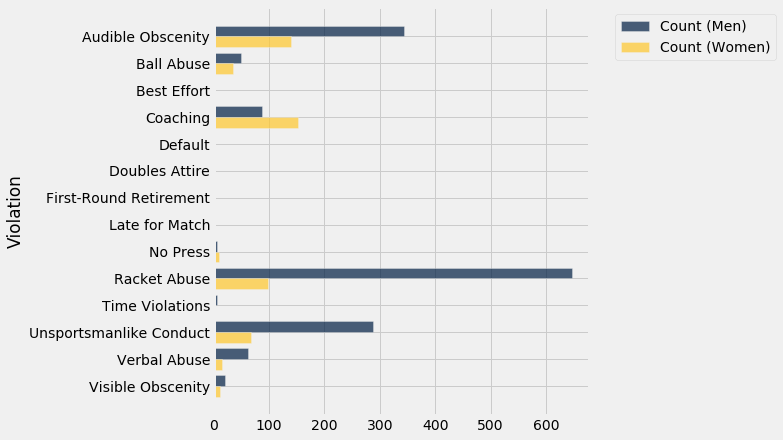

In [32]:
combined.barh('Violation')

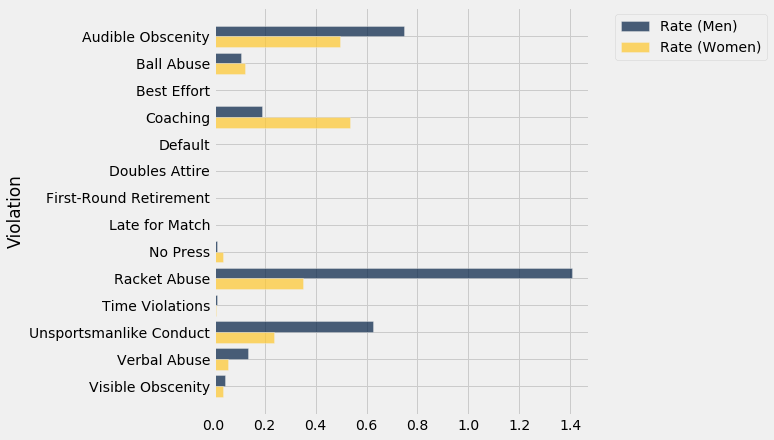

In [33]:
men_sets = 460
women_sets = 283
normalized = combined.with_columns(
    'Rate (Men)', combined.column('Count (Men)') / men_sets,
    'Rate (Women)', combined.column('Count (Women)') / women_sets
)
normalized.drop('Count (Men)', 'Count (Women)').barh('Violation')

## Bikes

In [34]:
###-----Bike rentals in Bay Area from 9/2014-8/2015
# Trip ID = ID for the rental
# Duration = duration of rental (seconds)
# Start date = start date of rental
# Start Station = Name of the Start Station 
# Start Terminal = code for Start Terminal
# End Date = end date of rental
# End Station = Name of the End Station 
# End Terminal = code for End Terminal
# Bike # = A serial number for the bike
# Subscriber Type = "Customer" or "Subscriber"
# Zip code 

trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


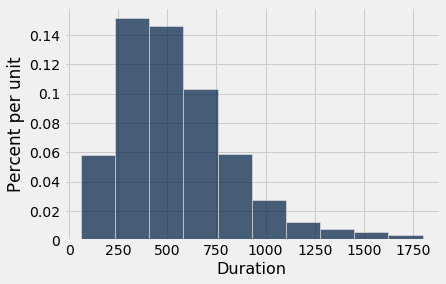

In [35]:
# Trips < 1800 seconds (30 min) are free!
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration')

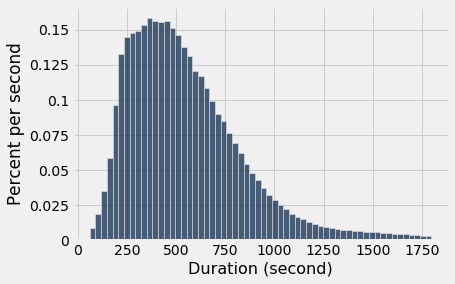

In [36]:
commute.hist('Duration', bins=60, unit='second')

In [37]:
# Most trips between the 250 and 550 range
# Rough estimate of percent between 250 and 550  minutes
(550-250) * 0.15

45.0

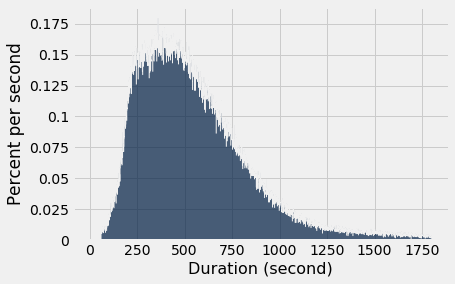

In [38]:
# Smaller/more bins, but general shape of the distributions stays the same
commute.hist('Duration', bins=np.arange(1801), unit='second')

In [39]:
# What is the most frequently used start station?
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


San Francisco Caltrain Station on Townsend and 4th - place where people who take the train into the city can grab a bike to get to work, etc.

In [40]:
# Pivot can be used to investigate between which stations people are traveling
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Shortest trips

In [41]:
# Look at durations between start and end stations
duration = trips.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [42]:
# Use the group method and find the minimum duration
# One trip started and ended at 2nd at Folsom
shortest = duration.group(['Start Station', 'End Station'], min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [43]:
# Civic Center Bart (7th at Market) is a popular location
# We can investigate where people are headed from there, along with the shortest trip duration
from_cc = shortest.where('Start Station', are.containing('Civic Center BART')).sort('Duration min')
from_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


## Maps

In [44]:
# Locations of each bike station
stations = Table.read_table('station.csv').relabel("name","labels")
stations

station_id,labels,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [45]:
# Draw map where stations are located
Marker.map_table(stations.select('lat', 'long', 'labels'))

In [46]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'labels'), color='green', radius=50)

In [47]:
# Color the markers according to the landmark
colors = stations.group('landmark').with_column(
    'colors', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,colors
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [48]:
stations.join('landmark', colors)

landmark,station_id,labels,lat,long,dockcount,installation,count,colors
Mountain View,27,Mountain View City Hall,37.3892,-122.082,15,8/16/2013,7,blue
Mountain View,28,Mountain View Caltrain Station,37.3944,-122.077,23,8/15/2013,7,blue
Mountain View,29,San Antonio Caltrain Station,37.4069,-122.107,23,8/15/2013,7,blue
Mountain View,30,Evelyn Park and Ride,37.3903,-122.067,15,8/16/2013,7,blue
Mountain View,31,San Antonio Shopping Center,37.4004,-122.108,15,12/31/2013,7,blue
Mountain View,32,Castro Street and El Camino Real,37.386,-122.084,11,12/31/2013,7,blue
Mountain View,33,Rengstorff Avenue / California Street,37.4002,-122.099,15,8/16/2013,7,blue
Palo Alto,34,Palo Alto Caltrain Station,37.444,-122.165,23,8/14/2013,5,red
Palo Alto,35,University and Emerson,37.4445,-122.163,11,8/15/2013,5,red
Palo Alto,36,California Ave Caltrain Station,37.4291,-122.143,15,8/14/2013,5,red


In [49]:
colored = stations.join('landmark', colors).select('lat', 'long', 'labels', 'colors')
Marker.map_table(colored)

In [50]:
# Recall the counts per Start Station
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [51]:
station_starts = stations.join('labels', starts, 'Start Station')
station_starts

labels,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


In [52]:
Circle.map_table(station_starts.select('lat', 'long', 'labels').with_columns(
    'colors', 'blue',
    'areas', station_starts.column('count')
))